## House price study - ML

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.set_printoptions(precision=2)    #Prinout options

#Read the main dataset
house = pd.read_csv('../Data/house_data/kc_house_data.csv')

In [ ]:
X_house = house['sqft_living']
y_house = house['price']

#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size = 0.2, random_state = 0)

In [ ]:
X_train_shaped = X_train.values.reshape(-1, 1)
y_train_shaped = y_train.values.reshape(-1, 1)
X_test_shaped = X_test.values.reshape(-1, 1)
y_test_shaped = y_test.values.reshape(-1, 1)

In [13]:
print(X_train_shaped.shape)
print(y_train_shaped.shape)
print(X_test_shaped.shape)
print(y_test_shaped.shape)

(17290, 1)
(17290, 1)
(4323, 1)
(4323, 1)


## 1. Linear regression model

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_shaped, y_train_shaped)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {}'
     .format(linreg.score(X_train_shaped, y_train_shaped)))
print('R-squared score (test): {}'
     .format(linreg.score(X_test_shaped, y_test_shaped)))

linear model coeff (w): [[284.15]]
linear model intercept (b): [-48536.69]
R-squared score (training): 0.4955208042581801
R-squared score (test): 0.4792403526045056


### Plot the linear regression model

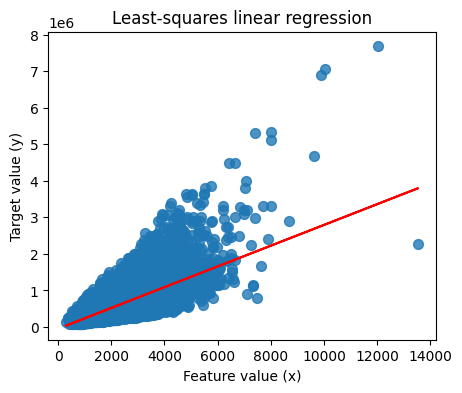

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(X_train_shaped, y_train_shaped, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train_shaped, linreg.coef_ * X_train_shaped + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Calculate RMSE

In [6]:
house['price'].mean()

540182.1587933188

In [7]:
from sklearn.metrics import mean_squared_error
house_pred = linreg.predict(X_test_shaped)
print("Coefficients: {}".format(linreg.coef_))
print("Intercept is: {}".format(linreg.intercept_))
print("Mean squared error: {}".format(mean_squared_error(y_test_shaped, house_pred, squared = False)))

Coefficients: [[284.15]]
Intercept is: [-48536.69]
Mean squared error: 249027.34683633628


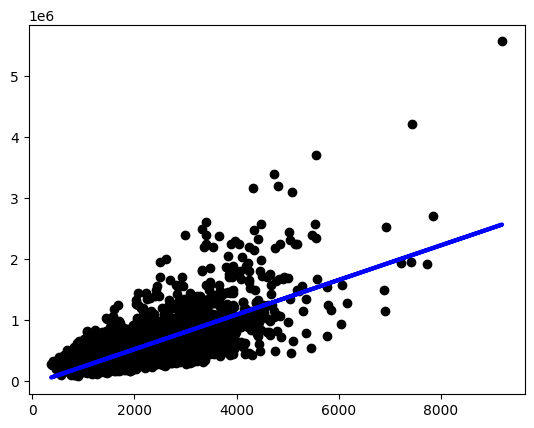

In [8]:
plt.scatter(X_test_shaped, y_test_shaped, color='black')
plt.plot(X_test_shaped, house_pred, color='blue', linewidth = 3)

## Explore multiple features now

In [9]:
my_features = ['bedrooms', 'sqft_living', 'bathrooms', 'zipcode', 'sqft_lot', 'floors']
house[my_features].head()

,bedrooms,sqft_living,bathrooms,zipcode,sqft_lot,floors
0,3,1180,1.00,98178,5650,1.0
1,3,2570,2.25,98125,7242,2.0
2,2,770,1.00,98028,10000,1.0
3,4,1960,3.00,98136,5000,1.0
4,3,1680,2.00,98074,8080,1.0


In [15]:
#Split the data into test and train
X_house_m = house[['bedrooms', 'sqft_living', 'bathrooms', 'zipcode', 'sqft_lot', 'floors']]
y_house_m = house['price']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_house_m, y_house_m, test_size = 0.2, random_state = 0)
#X_train_shaped_m = X_train_m.values.reshape(-1, 1)
#y_train_shaped_m = y_train_m.values.reshape(-1, 1)
#X_test_shaped_m = X_test_m.values.reshape(-1, 1)
#y_test_shaped_m = y_test_m.values.reshape(-1, 1)
#print(X_train_shaped_m.shape)
#print(y_train_shaped_m.shape)
#print(X_test_shaped_m.shape)
#print(y_test_shaped_m.shape)
print(X_train_m.shape)
print(y_train_m.shape)
print(X_test_m.shape)
print(y_test_m.shape)

(17290, 6)
(17290,)
(4323, 6)
(4323,)


In [17]:
linreg_multi_house = LinearRegression()
linreg_multi_house.fit(X_train_m, y_train_m)
print('linear model coeff (w): {}'
     .format(linreg_multi_house.coef_))
print('linear model intercept (b): {}'
     .format(linreg_multi_house.intercept_))
print('R-squared score (training): {}'
     .format(linreg_multi_house.score(X_train_m, y_train_m)))
print('R-squared score (test): {}'
     .format(linreg_multi_house.score(X_test_m, y_test_m)))

linear model coeff (w): [-5.66e+04  3.21e+02  1.11e+04  6.19e+02 -2.90e-01 -2.43e+03]
linear model intercept (b): -60616375.95755841
R-squared score (training): 0.5181496091252862
R-squared score (test): 0.49946084951877423
